# **Head Injuries in the NFL**

# **Fall 2024 Data Science Project**




**Arnav Kulkarni:** Introduced the project idea to the group and the types of data that should be collected. Worked on the Chi-Squared test to determine relationships between categorical variables that were used in our ML model. Created an ML model using Clustering to help determine the relationships between various factors, such as preseason and regular season concussion rates, player safety protocols and injury trends, allowing for more informed decision-making in improving player safety and minimizing head injuries throughout the NFL season. Provided a thorough explanation on the purpose of our machine learning models and how they can help mitigate the number of future head injuries in the National Football League.

**Gregory Gates:** Worked on data exploration, multiple linear regression ML Algorithm design/development, training and testing, and visualization/result analysis. Put together test 2 and 3 of the exploratory data analysis as well as the multiple linear regression and accompanying analysis and visualizations found in the primary analysis and visualization section.

**Jonathan Vo:** Worked on the data curation, finalizing each dataset transformations. Helped with exploratory data analysis and put together test 4 using ANOVA testing for preliminary insights in one of the datasets while also contributing towards the final insights.

**Daniel Fesenko:** Created header section with all contributor names and contributions. Described our plan for the project in the introduction section, specifically what kind of data we are using and how exactly we will be analyzing it. Wrote thorough conclusions and insights section, summarizing what we learned from our study, highlighting areas of improvement, and giving ideas for potential future research and insights, and ways that our research could be applied to other fields. Contributed to commmenting/annotating code throughout various sections.

**Rishi Erigineni:** Worked on the introduction in regard to gathering ideas and focusing aim within our topic of concussions. Worked on Data Exploratory Analysis by utilizing Chi-Squared testing in finding categorical significance between two variables used in our ML model. Furthered our confidence in our Linear Regression by developing a support Cluster model/analysis. Gathered main ideas in order to sculpt insights in a way that represented all knowledge levels on the spectrum of NFL head injuries. Published Final Tutorial.

**Spencer Bernal:** Worked on finding potential datasets for the project to use. Preprocessed and cleaned all the datasets using various imputation techniques learned in class. Parsed and converted data types from datasets to more usable data types that would be used for training and testing data. Worked on annotations in data curation section and added to final insights.

# **Introduction**

The purpose of this project is to understand the intricacies of Concussions in the National Football League and why there has been little success in pinpointing and limiting the occurences of these blows to the football players. Our group members, like many Americans, are avid American Football watchers and have seen our favorite players go through head injuries more than once. The effects of these injuries seem to be everlasting, not allowing the player to reach the same level of performance they were on previous to the injury.

With that said, our group realizes that there are many factors that involve a player's season, with many of them preceding and possibly increasing chances of injury. By comparing and predicting outcomes for these players using our knowledge of Data Science, we can find better paths for players to take in maximizing their potential.

In this project, we will be gathering NFL head injury data from various sources, curating it, and performing various analyses on it in order to determine a correlation between one or more factors, and seeing if we can pinpoint what makes a player more likely to have a head injury, and what are the likely outcomes for a player after a head injury. Our first test will be performing a chi-squared analysis in order to see whether or not a team's injury being in the pre-season has an effect on that team being a winning team. Our second test will be a frequency analysis, showing us which teams have the highest incidence of their opposing teams suffering head injuries during football games. Our third test will be an ANOVA test to see whether or not a player's position has an effect on their likelihood of sustaining a head injury. Finally, we will be performing an analysis and visualization, creating a multiple linear regression in order to determine the correlation of all these factors with head injury rates.

# **Data Curation**

In [74]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Get datasets from drive:**

In [76]:
concussionNFLdf = pd.read_csv('/content/drive/MyDrive/concussionNFL.csv')
headinjury_df = pd.read_csv('/content/drive/MyDrive/Head Injured Players.csv')
concussiondf = pd.read_csv('/content/drive/MyDrive/Concussion.csv')
NFL_concussiondf = pd.read_csv('/content/drive/MyDrive/NFL Concussion 2015-2023.csv')

**Get datasets from files:**

In [77]:
concussionNFLdf = pd.read_csv('/content/concussionNFL.csv')
headinjury_df = pd.read_csv('/content/Head Injured Players.csv')
concussiondf = pd.read_csv('/content/Concussion.csv')
NFL_concussiondf = pd.read_csv('/content/NFL Concussion 2015-2023.csv')

**concussionNFLdf** from [Glaikit7's Github repo](https://github.com/Glaikit7/NFLConcussion/blob/main/concussionNFL.csv) is a dataset of NFL players who had concussions and head injuries for games occuring between 2012 and 2014. Other useful data includes their playtimes before and after injury, how many games they missed, and the position they played in.

**headinjury_df** from [ali-ce's Github repo](https://github.com/ali-ce/datasets/blob/master/NFL/Head%20Injured%20Players.csv) is another dataset of NFL players who had concussions during games between 2012 and 2014. The primary difference between this and the previous dataset is that it includes player age data. Cross-referencing can be done with the previous dataset along with trends related to player age.

**concussiondf** from [stfurey's Github repo](https://github.com/stfurey/NFL_Concussions_Data_Analysis/blob/main/Concussion.csv) is a dataset of NFL players who had concussions during games between 2012 and 2015. Multiple rows with the same player name mean that player had multiple concussions during the reported season or year, also including playtime before and after the concussion. This dataset accounts for multiple concussion instances along with data from 2015's games.

**NFL_concussiondf** from [kaggle](https://www.kaggle.com/datasets/ajvazquez/nfl-concussions-from-2015-2023?resource=download) is a dataset of total NFL concussion counts from 2015 to 2023 across preseason games+practices and regular season games+practices. This data can be used alongside the data from previous years.

We will start by looking at **concussiondf**:

In [78]:
print(f"Shape: {concussiondf.shape[0]} rows, {concussiondf.shape[1]} columns (features)")
concussiondf.head()

Shape: 516 rows, 9 columns (features)


,Player,Team,Position,Winning_Team,Season,Games_Missed,Playtime_Before,Playtime_After,Playtime_Lost
0,A.J. Bouye,Houston Texans,Cornerback,1,2015/2016,1,28,16,12
1,A.J. Jefferson,Minnesota Vikings,Cornerback,1,2012/2013,0,40,84,-44
2,A.J. Klein,Carolina Panthers,Linebacker,1,2015/2016,1,63,22,41
3,Aaron Lynch,San Francisco 49ers,Linebacker,1,2015/2016,2,62,59,3
4,Aaron Williams,Buffalo Bills,Safety,1,2014/2015,0,71,87,-16


In [79]:
concussiondf.isna().any()

,0
Player,False
Team,False
Position,False
Winning_Team,False
Season,False
Games_Missed,False
Playtime_Before,False
Playtime_After,False
Playtime_Lost,False


**concussiondf** appears to be cleaned already. The data types are correct with no null or missing values.

Next, we look at **headinjury_df**:

In [80]:
print(f"Shape: {headinjury_df.shape[0]} rows, {headinjury_df.shape[1]} columns (features).")
headinjury_df.head()

Shape: 343 rows, 17 columns (features).


,Player,2012/2013 - Number of Injuries,2012/2013 - Games Missed,2013/2014 - Number of Injuries,2013/2014 - Games Missed,2014/2015 - Number of Injuries,2014/2015 - Games Missed,Total Number of Injuries (2012-2014),Total Games Missed (2012-2014),Age first concussion (2012-2014),Team(s) during concussion incidents 2012-2014,Roles during injuries,Current Age (approx.),Date of Birth,Biography,Wikipedia Url,Image
0,DeAndre Hopkins,NaN,NaN,1.0,0.0,NaN,NaN,1,0,21.26,Houston Texans,Wide Receiver,22,6/06/1992,"DeAndre Rashaun Hopkins (born June 6, 1992), a...",http://en.wikipedia.org/wiki/DeAndre_Hopkins,//upload.wikimedia.org/wikipedia/commons/6/60/...
1,Le'Veon Bell,NaN,NaN,1.0,0.0,NaN,NaN,1,0,21.78,Pittsburgh Steelers,Running Back,23,18/02/1992,Le'Veon Bell (pronounced LAY-vee-on; born Febr...,http://en.wikipedia.org/wiki/Le'Veon_Bell,//upload.wikimedia.org/wikipedia/commons/b/b7/...
2,Tony Jefferson,NaN,NaN,NaN,NaN,1.0,0.0,1,0,22.75,Arizona Cardinals,Safety,23,27/01/1992,"Tony Jefferson (born January 27, 1992) is an A...",http://en.wikipedia.org/wiki/Tony_Jefferson,http://a.espncdn.com/combiner/i?img=/i/headsho...
3,James Wright,NaN,NaN,NaN,NaN,1.0,0.0,1,0,22.68,Cincinnati Bengals,Wide Receiver,23,31/12/1991,"James Earl Wright (born December 31, 1991) is ...",http://en.wikipedia.org/wiki/James_Wright_(wid...,http://a.espncdn.com/combiner/i?img=/i/headsho...
4,Joseph Randle,NaN,NaN,NaN,NaN,1.0,0.0,1,0,22.71,Dallas Cowboys,Running Back,23,29/12/1991,"Joseph Randle (born December 29, 1991) is an A...",http://en.wikipedia.org/wiki/Joseph_Randle,http://a.espncdn.com/combiner/i?img=/i/headsho...


**Biography, Wikipedia Url, and Image** are columns that are irrelevant to us, so we will drop them.

In [81]:
headinjury_df.drop(columns= ['Biography','Wikipedia Url', 'Image'], inplace=True)

We can see several Null/missing values across the injuries and games missed columns. Just to confirm:

In [82]:
headinjury_df.isna().any()

,0
Player,False
2012/2013 - Number of Injuries,True
2012/2013 - Games Missed,True
2013/2014 - Number of Injuries,True
2013/2014 - Games Missed,True
2014/2015 - Number of Injuries,True
2014/2015 - Games Missed,True
Total Number of Injuries (2012-2014),False
Total Games Missed (2012-2014),False
Age first concussion (2012-2014),False


We will fill the missing values with 0.

In [83]:
headinjury_df = headinjury_df.fillna(0)

Lastly, we will standardize the **Date of Birth** column converting it from **DD/MM/YYYY** to the **YYYY-MM-DD** format for easier use later.

In [84]:
headinjury_df['Date of Birth'] = pd.to_datetime(headinjury_df['Date of Birth'], dayfirst= True)
print(f"Shape: {headinjury_df.shape[0]} rows, {headinjury_df.shape[1]} columns (features).")
headinjury_df.head()

Shape: 343 rows, 14 columns (features).


,Player,2012/2013 - Number of Injuries,2012/2013 - Games Missed,2013/2014 - Number of Injuries,2013/2014 - Games Missed,2014/2015 - Number of Injuries,2014/2015 - Games Missed,Total Number of Injuries (2012-2014),Total Games Missed (2012-2014),Age first concussion (2012-2014),Team(s) during concussion incidents 2012-2014,Roles during injuries,Current Age (approx.),Date of Birth
0,DeAndre Hopkins,0.0,0.0,1.0,0.0,0.0,0.0,1,0,21.26,Houston Texans,Wide Receiver,22,1992-06-06
1,Le'Veon Bell,0.0,0.0,1.0,0.0,0.0,0.0,1,0,21.78,Pittsburgh Steelers,Running Back,23,1992-02-18
2,Tony Jefferson,0.0,0.0,0.0,0.0,1.0,0.0,1,0,22.75,Arizona Cardinals,Safety,23,1992-01-27
3,James Wright,0.0,0.0,0.0,0.0,1.0,0.0,1,0,22.68,Cincinnati Bengals,Wide Receiver,23,1991-12-31
4,Joseph Randle,0.0,0.0,0.0,0.0,1.0,0.0,1,0,22.71,Dallas Cowboys,Running Back,23,1991-12-29


The next dataset is **concussionNFLdf**:

In [85]:
print(f"Shape: {concussionNFLdf.shape[0]} rows, {concussionNFLdf.shape[1]} columns (features).")
concussionNFLdf.head()

Shape: 392 rows, 18 columns (features).


,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


We'll start by converting the **Date** column format to **YYYY-MM-DD**:

In [86]:
concussionNFLdf['Date'] = pd.to_datetime(concussionNFLdf['Date'], dayfirst= True)

We will drop the **ID** column because it is redundant

In [87]:
concussionNFLdf.drop(columns=['ID'], inplace=True)

Next, we confirm which columns have null values:

In [88]:
concussionNFLdf.isna().any()

,0
Player,False
Team,False
Game,False
Date,False
Opposing Team,False
Position,False
Pre-Season Injury?,False
Winning Team?,False
Week of Injury,False
Season,False


Starting with **Games Missed**, we will perform mean imputation to fill in the missing values and convert the data type to integers.

In [89]:
concussionNFLdf['Games Missed'] = concussionNFLdf['Games Missed'].fillna(concussionNFLdf['Games Missed'].mean())
concussionNFLdf['Games Missed'] = concussionNFLdf['Games Missed'].astype(int)

For **Reported Injury Type**, we will drop the rows with missing values.

In [90]:
concussionNFLdf = concussionNFLdf.dropna(subset=['Reported Injury Type'])

For **Play Time After Injury**, we drop rows where players "Did not return from injury", convert the data type from string to integer, and then fill missing values using mean imputation.

In [91]:
#concussionNFLdf = concussionNFLdf[concussionNFLdf['Play Time After Injury'] != 'Did not return from injury']
concussionNFLdf['Play Time After Injury'].replace('Did not return from injury', "0 downs", inplace=True)

concussionNFLdf['Play Time After Injury'].fillna("-1", inplace=True)
concussionNFLdf['Play Time After Injury'] = concussionNFLdf['Play Time After Injury'].str.replace(" downs", "").astype(int)
concussionNFLdf['Play Time After Injury'].replace(-1, concussionNFLdf['Play Time After Injury'][concussionNFLdf['Play Time After Injury'] != -1].mean(), inplace=True)
concussionNFLdf['Play Time After Injury'] = concussionNFLdf['Play Time After Injury'].astype(int)

For **Average Playtime Before Injury**, we convert the data type from string to integer and fill missing values using mean imputation.

In [92]:
concussionNFLdf['Average Playtime Before Injury'].fillna("-1", inplace=True)
concussionNFLdf['Average Playtime Before Injury'] = concussionNFLdf['Average Playtime Before Injury'].str.replace(" downs", "").astype(float)
concussionNFLdf['Average Playtime Before Injury'].replace(-1, concussionNFLdf['Average Playtime Before Injury'][concussionNFLdf['Average Playtime Before Injury'] != -1].mean(), inplace=True)
concussionNFLdf['Average Playtime Before Injury'] = concussionNFLdf['Average Playtime Before Injury'].astype(int)

concussionNFLdf

,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,2012-09-30,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1,No,Head,0,14,37
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,2013-09-22,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1,No,Concussion,0,78,73
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),2014-09-28,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1,No,Concussion,0,25,17
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,2014-10-12,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1,No,Head,0,82,41
4,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),2012-09-09,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,0,No,Head,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,2012-11-25,Baltimore Ravens,Safety,No,No,12,2012/2013,1,0,No,Concussion,85,90,76
388,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,2014-09-28,Indianapolis Colts,Comerback,No,No,4,2014/2015,1,1,No,Concussion,85,90,78
389,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,2012-12-23,Tennessee Titans,Guard,No,Yes,16,2012/2013,1,0,No,Concussion,87,70,73
390,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,2013-12-08,Cleveland Browns,Offensive Tackle,No,Yes,14,2013/2014,1,0,No,Concussion,87,52,78


Our final dataset is **NFL_concussiondf**.

In [93]:
NFL_concussiondf = pd.read_csv('/content/NFL Concussion 2015-2023.csv')

print(f"Shape: {NFL_concussiondf.shape[0]} rows, {NFL_concussiondf.shape[1]} columns (features).")
NFL_concussiondf.head()

Shape: 10 rows, 10 columns (features).


,Unnamed: 0,Preseason,Unnamed: 2,Unnamed: 3,Regular Season,Unnamed: 5,Unnamed: 6,Preseason + Regular Season,Unnamed: 8,Unnamed: 9
0,Year,Game,Practice,Total,Game,Practice,Total,Game,Practice,Total
1,2015,54,29,83,183,9,192,237,38,275
2,2016,45,26,71,166,6,172,211,32,243
3,2017,46,45,91,179,11,190,225,56,281
4,2018,34,45,79,127,8,135,161,53,214


The first row in the table are strings that should be part of the column titles. We will fix that by removing the row and renaming the columns appropriately.

In [94]:
NFL_concussiondf = NFL_concussiondf.drop(0).reset_index(drop=True)
NFL_concussiondf.rename(columns= {'Unnamed: 0':'Year',
                                  'Preseason': 'Preseason Game',
                                  'Unnamed: 2': 'Preseason Practice',
                                  'Unnamed: 3': 'Preseason Total',
                                  'Regular Season': 'Regular Season Game',
                                  'Unnamed: 5': 'Regular Season Practice',
                                  'Unnamed: 6': 'Regular Season Total',
                                  'Preseason + Regular Season': 'Regular Season + Preseason Game',
                                  'Unnamed: 8': 'Regular Season + Preseason Practice',
                                  'Unnamed: 9': 'Regular Season + Preseason Total'}, inplace= True)
NFL_concussiondf

,Year,Preseason Game,Preseason Practice,Preseason Total,Regular Season Game,Regular Season Practice,Regular Season Total,Regular Season + Preseason Game,Regular Season + Preseason Practice,Regular Season + Preseason Total
0,2015,54,29,83,183,9,192,237,38,275
1,2016,45,26,71,166,6,172,211,32,243
2,2017,46,45,91,179,11,190,225,56,281
3,2018,34,45,79,127,8,135,161,53,214
4,2019,49,30,79,136,9,145,185,39,224
5,2020,NaN,30,30,129,13,142,129,43,172
6,2021,22,30,52,126,9,135,148,39,187
7,2022,27,25,52,149,12,161,176,37,213
8,2023,32,26,58,152,9,161,184,35,219


There is one missing value for the **2020 Preseason Game**. All of the preseason games in 2020 were cancelled due to COVID-19, so we will set the value to 0.

In [95]:
NFL_concussiondf = NFL_concussiondf.fillna(0).astype(int)
NFL_concussiondf

,Year,Preseason Game,Preseason Practice,Preseason Total,Regular Season Game,Regular Season Practice,Regular Season Total,Regular Season + Preseason Game,Regular Season + Preseason Practice,Regular Season + Preseason Total
0,2015,54,29,83,183,9,192,237,38,275
1,2016,45,26,71,166,6,172,211,32,243
2,2017,46,45,91,179,11,190,225,56,281
3,2018,34,45,79,127,8,135,161,53,214
4,2019,49,30,79,136,9,145,185,39,224
5,2020,0,30,30,129,13,142,129,43,172
6,2021,22,30,52,126,9,135,148,39,187
7,2022,27,25,52,149,12,161,176,37,213
8,2023,32,26,58,152,9,161,184,35,219


# **Exploratory Data Analysis**

In order to understand the significance of our cleaned data, we must put it through certain tests and cross-analyze. This will lead to further use in ML models if necesary in understanding concussion relations.

# **Test 1:**
We will be using a Chi-Squared Test here to speak on the variables of pre-season injury status and if the team the injured player was on was victorious.

H0: An injury being in the pre-season does not have an effect on if the team is a winning team.

HA: H0: An injury being in the pre-season does have an effect on if the team is a winning team.

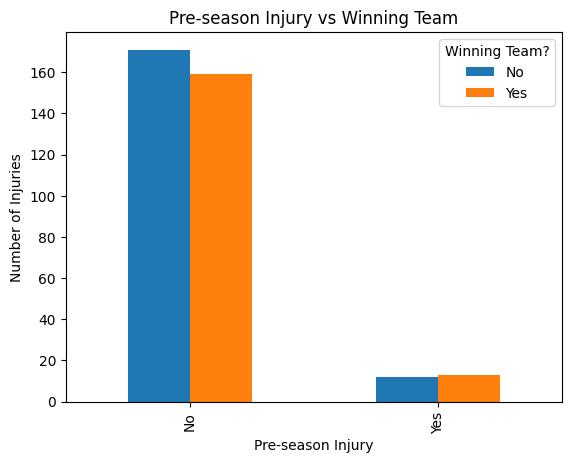

In [ ]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# creates a crosstab table which allows us to see our two variables referentially against one another
tbl = pd.crosstab(concussionNFLdf['Pre-Season Injury?'], concussionNFLdf['Winning Team?'])

tbl.plot(kind = 'bar')
plt.title('Pre-season Injury vs Winning Team')
plt.xlabel('Pre-season Injury')
plt.ylabel('Number of Injuries')
plt.show()



Off the rip, the plot illustration shows that there are very little occurences of pre-season inujuries coinciding with the winning team category. With our statistical knowledge and testing, we can answer why this might be and what it means.

In [ ]:
p = chi2_contingency(tbl)
# p-value second param
p[1]

0.87227597713575

Since we have a calculated p value of 0.87, we can reject the null hypothesis and consider that there is an effect of a pre-season head injury on the case of the injury being on a winner.


Through our statistical analysis of the two categorical variables, we can see that we were able to cross-reference and compare from a dataset that provides us various NFL players with previous head injuries and the specific circumstances of those occurences. The case of if the player has had a pre-season injury and whether they were on a the winning team during their regular season injury both can be answered with a YES or NO. Using background knowledge, we can understand that generally teams with weaker roster-strength will start their premier players in the preseason, making them more susceptible to injury in the first place. This notion gives us grounds to think that there may be a lack of variable independence in which losing teams have more injured players coinciding with their preseason status. Outliers are not a concern for this.

# **Test 2:**

Considering the dataset "ConcussionNFLdf", which team hold the greatest risk of being injured against? (i.e. which "opposing team" occurs most frequently throughout the dataset?)

<function matplotlib.pyplot.show(close=None, block=None)>

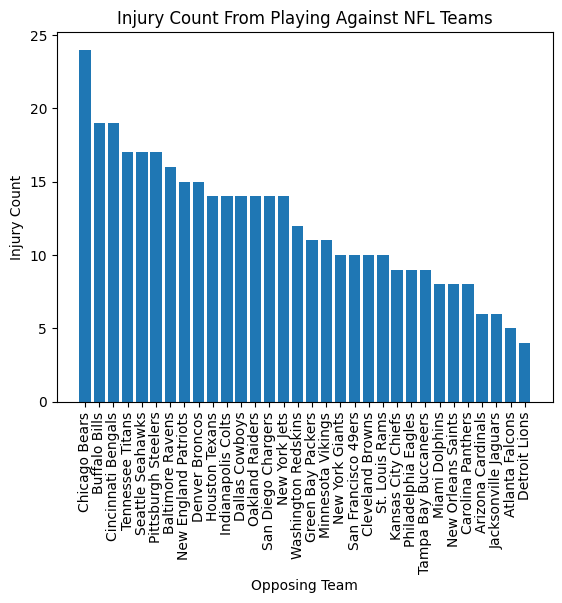

In [97]:
import matplotlib.pyplot as plt
counts = concussionNFLdf['Opposing Team'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.gca().set(xlabel='Opposing Team', ylabel='Injury Count', title='Injury Count From Playing Against NFL Teams')
plt.show

From the histogram, we see that the most injuries occured against the Chicago Bears. Thus, we can conclude that players have the highest chance of being injured when playing against Chicago.

We can also see that the second most injuries occured against the Cincinnati Bengals, third most against the Buffalo Bills, and so on.

# **Test 3:**
Does a players position influence their average playtime before injury? (Assume  𝛼=0.05 )

H0: The position of a player does not effect their average playtime before injury.

HA: The position of a player does effect their average playtime before injury.

In [98]:
concussionNFLdf['Position'].value_counts()

,count
Position,
Comerback,64
Wide Receiver,56
Safety,51
Running Back,39
Tight End,38
Linebacker,35
Guard,26
Offensive Tackle,22
Defensive End,20


In [99]:
import scipy.stats as stats
from scipy.stats import f_oneway

#Group dataset by Position column
grouped = concussionNFLdf.groupby('Position')

#For each position in grouped data, initialize empty array
for name, group in grouped:
  #Check the position name and extract "Average Playtime Before Injury" column,
  #and convert to NumPy array for each position
  if name == "Comerback":
    cb = np.array(group['Average Playtime Before Injury'])
  if name == "Wide Receiver":
    wr = np.array(group['Average Playtime Before Injury'])
  if name == "Safety":
    s = np.array(group['Average Playtime Before Injury'])
  if name == "Running Back":
    rb = np.array(group['Average Playtime Before Injury'])
  if name == "Linebacker":
    lb = np.array(group['Average Playtime Before Injury'])
  if name == "Tight End":
    te = np.array(group['Average Playtime Before Injury'])
  if name == "Offensive Tackle":
    ot = np.array(group['Average Playtime Before Injury'])
  if name == "Guard":
    g = np.array(group['Average Playtime Before Injury'])
  if name == "Defensive End":
    de = np.array(group['Average Playtime Before Injury'])
  if name == "Center":
    c = np.array(group['Average Playtime Before Injury'])
  if name == "Full Back":
    fb = np.array(group['Average Playtime Before Injury'])
  if name == "Long Snapper":
    ls = np.array(group['Average Playtime Before Injury'])

#Perform one-way ANOVA test to compare the means of playtime before injury
#across all player positions, to determine if there's any statistically
#significant difference between groups.
f_oneway(cb, wr, s, rb, lb, te, ot, g, de, c, fb, ls)

F_onewayResult(statistic=6.422418075300149, pvalue=1.0041127416452634e-09)

[Text(0.5, 0, 'Position'),
 Text(0, 0.5, 'Average Playtime Before Injury'),
 Text(0.5, 1.0, 'Average Playtime Before Injury by Position')]

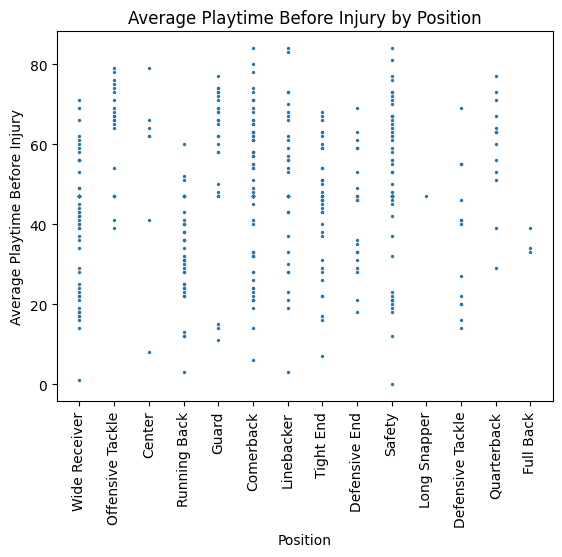

In [100]:
plt.scatter(concussionNFLdf['Position'], concussionNFLdf['Average Playtime Before Injury'], s=2)
plt.xticks(rotation=90)
plt.gca().set(xlabel='Position', ylabel='Average Playtime Before Injury', title='Average Playtime Before Injury by Position')

Since the p-value found above (pvalue=9.084471256283748e-09) is less than 𝛼 (𝛼=0.05), we reject the null hypothesis. Hence, the position of a player does effect their average playtime before injury.

In other words, we can say with 95% confidence that the position of a player has an effect on that players average playtime before injury. For more information on F-tests, like the one used above, click [here](https://en.wikipedia.org/wiki/F-test)

# **Test 4:**
We would like to see if a player's primary position may have affected the number of concussions they received, using data from between 2012 and 2014.

**H0:** The player's position does not affect their total concussion count.

**H1:** The player's position does affect their total concussion count.

**𝛼=0.05**

We exclude players who played multiple positions between 2012 and 2014.

In [101]:
injury_counts_df = headinjury_df[["Total Number of Injuries (2012-2014)", "Roles during injuries"]][~headinjury_df['Roles during injuries'].str.contains(',')]
positions_group = injury_counts_df.groupby('Roles during injuries')
injuries_by_position = {position:list(group['Total Number of Injuries (2012-2014)']) for position, group in positions_group}
f_oneway(*(injuries_by_position.values()))

F_onewayResult(statistic=1.374773783281117, pvalue=0.1696284387247829)

With the one-way ANOVA test, the p-value of 0.169 is greater than 𝛼=0.05, and we fail to reject the null hypothesis.

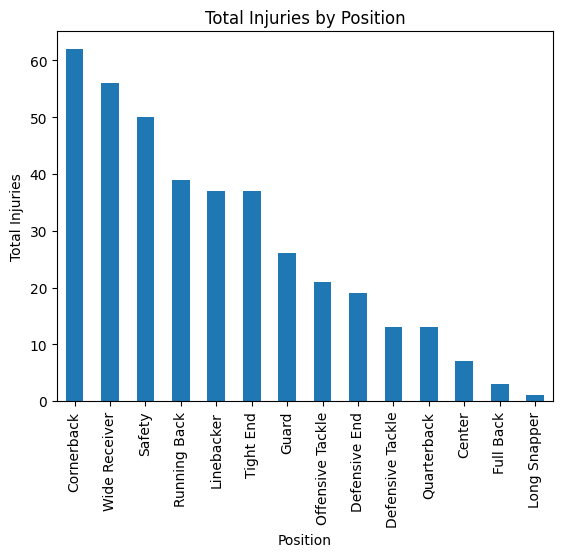

In [102]:
positions_group.sum().sort_values(by="Total Number of Injuries (2012-2014)",ascending=False).plot(kind='bar', legend=None)
plt.title('Total Injuries by Position')
plt.xlabel('Position')
plt.ylabel('Total Injuries')
plt.show()

While we can see a range of total concussion counts among the positions, the graph moreso highlights the imbalance in the number of players across them.

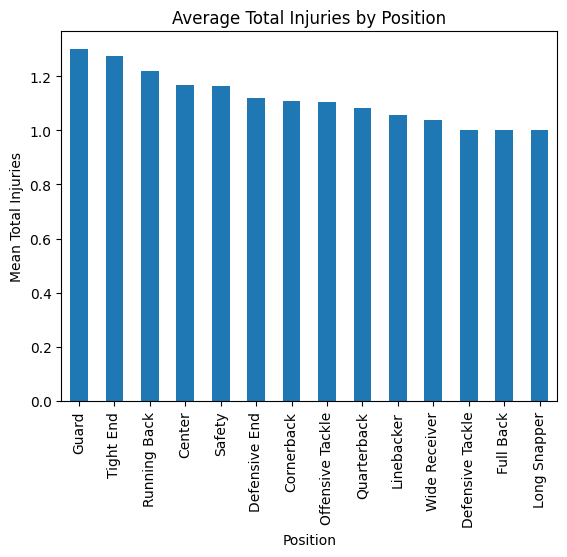

In [103]:
positions_group.mean().sort_values(by="Total Number of Injuries (2012-2014)",ascending=False).plot(kind='bar', legend=None)
plt.title('Average Total Injuries by Position')
plt.xlabel('Position')
plt.ylabel('Mean Total Injuries')
plt.show()

This graph better represents the results of our one-way ANOVA test, showing the very similar average total injuries for each position.

# **Primary Analysis and Visualization: Linear Regression**

As previously stated, the effects of head injuries in the NFL seem to be everlasting. We wish to explore how these injuries impact the longevity of players based on the obervations of our dataset. In continuation from the above tests, we will continue using the concussionNFLdf dataset. More specifically, we will use the variables 'Position', 'Average Playtime Before Injury', 'Pre-Season Injury?', and 'Games Missed' to predict a player's Play Time After Injury. We aim to derive the underlying patters associated with these injuries, and discover trends that may provide insight into what NFL players can expect upon suffering a head injury.

**Import the following libraries, these will assist in creating our model. We will use a multiple linear regression to model the data.**

For more information on multiple linear regression, click [here](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/multiple-regression.html#:~:text=Multiple%20linear%20regression%20aims%20to,measured%20on%20a%20continuous%20scale.)

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**First, we will extract the features we wish to use in our model:**

In [105]:
model_df = concussionNFLdf[['Position', 'Average Playtime Before Injury', 'Play Time After Injury', 'Pre-Season Injury?', 'Games Missed']]
model_df

,Position,Average Playtime Before Injury,Play Time After Injury,Pre-Season Injury?,Games Missed
0,Wide Receiver,37,14,No,1
1,Offensive Tackle,73,78,No,1
2,Wide Receiver,17,25,No,1
3,Center,41,82,No,1
4,Running Back,47,0,Yes,0
...,...,...,...,...,...
387,Safety,76,90,No,0
388,Comerback,78,90,No,1
389,Guard,73,70,No,0
390,Offensive Tackle,78,52,No,0


Now that we have our model's dataset, we must handle the categorical predictors that we plan to use. We can do so by creating "dummy" variables. This will transform our categorical data into numerical data, which can be used in our regression equation.

Dummy variables work as follows. Say we have our predictor 'Position'. Dummy variables will create a new predictor for every possible value of 'Position', where the value of these new predictors is binary (either 0 or 1). For example, an observation for a wide reviever would have dummy_wide_reciever = 1, and all other dummy_position variables set to 0.

We have two categorical predictors: 'Position' and "Pre-Season Injury?', so we will need to create dummies for each of these.

For more information on dummy variables, click [here](https://en.wikipedia.org/wiki/Dummy_variable)

**Creating dummies for 'Position':**

In [106]:
dummies = pd.get_dummies(model_df['Position'], dtype=int)
model_df = pd.concat([model_df, dummies], axis= 1)
model_df.drop(columns= ['Position'], inplace= True)
model_df

,Average Playtime Before Injury,Play Time After Injury,Pre-Season Injury?,Games Missed,Center,Comerback,Defensive End,Defensive Tackle,Full Back,Guard,Linebacker,Long Snapper,Offensive Tackle,Quarterback,Running Back,Safety,Tight End,Wide Receiver
0,37,14,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,73,78,No,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,17,25,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,41,82,No,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,0,Yes,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,76,90,No,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
388,78,90,No,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
389,73,70,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
390,78,52,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**Creating dummies for 'Pre-Season Injury?':**

In [107]:
dummies = pd.get_dummies(model_df['Pre-Season Injury?'], dtype=int)
model_df = pd.concat([model_df, dummies], axis= 1)
model_df.drop(columns= ['Pre-Season Injury?'], inplace= True)
model_df

,Average Playtime Before Injury,Play Time After Injury,Games Missed,Center,Comerback,Defensive End,Defensive Tackle,Full Back,Guard,Linebacker,Long Snapper,Offensive Tackle,Quarterback,Running Back,Safety,Tight End,Wide Receiver,No,Yes
0,37,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,73,78,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,17,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,41,82,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,47,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,76,90,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
388,78,90,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
389,73,70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
390,78,52,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


Next, we define our X and y datasets. For this step, we are simply separating the predictors from the response. The following code will create our X and y datasets:

In [108]:
X = model_df.drop(columns= ['Play Time After Injury'])
y = model_df['Play Time After Injury']

Almost there! The final step before we fit our model is to split the X and y datasets into our traning and testing subsets. We will split the data 80/20, with 80% used for training, and 20% used for testing. The following code will create these subsets for us:

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Fitting The Model**

Now we can fit our model. The following code initializes our model as a Linear Regression, then fits our training data for us:

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Testing Our Model**

Now we can use our testing data that we set aside to assess our model, the following code will gather our model's predictions based on our X_test predictor values, which we can then compare to the true values of these observations in y_test.

In [111]:
y_pred = model.predict(X_test)

Finally, we can generate some summary statistics for our model and see how it performed! We will use Mean Squared Error and R-squared to assess our model. Mean Squares Error, commonly referred to as MSE, represents the average squared distance between the predicted and actual values of the response, which allows us to examine how far off our model's predictions were on avarage. R-squared tells us how much variation in the dependent variable is explained by the model, which is another helpful metric in assesing how well our model represents our data.

In [112]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 318.8077080947516
R-squared: 0.4416357767297244


From the R-squared output, we can see that out model has some room for improvement. However, this also demonstrates the unpredictable nature of head injuries in the NFL. Creating an accurate model for an event of this nature was something we expected to be difficult, but we are certainly on the right track!

Lets take a look at some of the underlying patterns between our predictors. Some of our favorite players are Wide Recievers, so we will focus on this postion for the final steps of our project. Considering all of the wide reciever's on our dataset, we can further partition this subset into wide revievers who suffered a pre-season injury, and those who did not. The follwing code will create two new datasets for us (wide recievers WITH pre-season injury, and wide recievers WITHOUT pre-season injury).

**Wide Recievers WITH Pre-Season Injury:**

In [113]:
wr_injured = model_df[(model_df['Wide Receiver'] == 1) & (model_df['Yes'] == 1)]
wr_injured

,Average Playtime Before Injury,Play Time After Injury,Games Missed,Center,Comerback,Defensive End,Defensive Tackle,Full Back,Guard,Linebacker,Long Snapper,Offensive Tackle,Quarterback,Running Back,Safety,Tight End,Wide Receiver,No,Yes
5,47,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,47,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
13,47,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
84,47,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
92,47,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
340,47,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


**Wide Recievers WITHOUT Pre-Season Injury:**

In [114]:
wr_not_injured = model_df[(model_df['Wide Receiver'] == 1) & (model_df['No'] == 1)]
wr_not_injured

,Average Playtime Before Injury,Play Time After Injury,Games Missed,Center,Comerback,Defensive End,Defensive Tackle,Full Back,Guard,Linebacker,Long Snapper,Offensive Tackle,Quarterback,Running Back,Safety,Tight End,Wide Receiver,No,Yes
0,37,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,17,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
23,69,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
24,22,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
25,14,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
39,56,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
43,29,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
45,1,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
72,36,61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
75,23,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


As we can see, there are significantly less observation of wide recievers that DID suffer a pre-season injury. Perhaps suffereing a pre-season injury reduces a player's likelihood of sufferering a head injury during the season? Or maybe this is simply a coincidence or lapse in data collection? Interesting!

While this project will not explore this relationship, this observation opens the door for new discoveries about head injuries in the NFL, and shows us how research can be guided by simple patterns in data such as this.

**Visualization**

Next, we can create some graphs using these subsets we have created. Since wr_not_injured contains more observations, we will focus on this data for our visualizations.

First, we will create a scatter plot to show the relationship between 'Average Playtime Before Injury" and 'Play Time After Injury' for Wide Recievers who DID NOT suffer a pre-season injury:

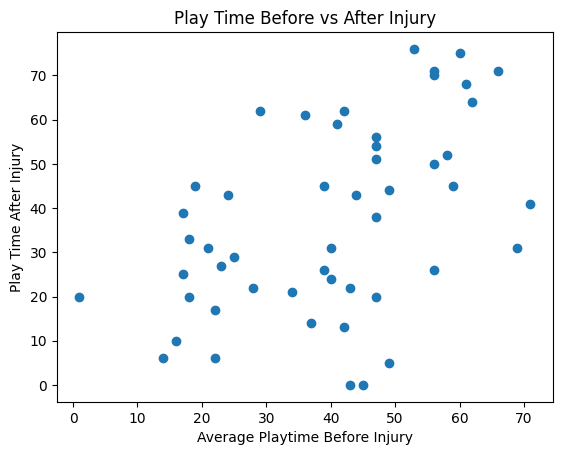

In [115]:
plt.scatter(x = wr_not_injured['Average Playtime Before Injury'], y = wr_not_injured['Play Time After Injury'])
plt.gca().set(xlabel='Average Playtime Before Injury', ylabel='Play Time After Injury', title='Play Time Before vs After Injury')
plt.show()

Finally, we will create a more complex plot to display the relationship between "Average Playtime Before Injury', 'Play Time After Injury', and 'Games Missed'. Additionally, we will fit a regression plane to show the trends between these threee predictors.

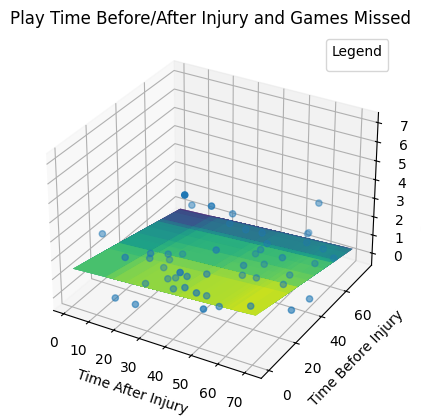

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the independent variables
y = wr_not_injured['Play Time After Injury']
x = wr_not_injured['Average Playtime Before Injury']
z = wr_not_injured['Games Missed']

# Add the data points
ax.scatter(x, y, z)

# Fit a plane using np.linalg.lstsq
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, cmap='viridis')

# Add labels and title
ax.set_xlabel('Time After Injury')
ax.set_ylabel('Time Before Injury')
ax.set_zlabel('Games Missed')
plt.title('Play Time Before/After Injury and Games Missed')

# Add legend
ax.legend(loc='upper right', title='Legend')


# Show the plot
plt.show()

From this plot, we can derive a few patterns from the dataset. We already know the relationship between Play Time Before and After Injury from the previous plot, but now we can see how these two predictors effect the number of games missed. As play time after injury increases, we see that the number of games missed decreases. However, there does not seem to be a strong relationship between playtime before injury and games missed.

# **Some Clustering**



First, we will load the dataset and choose two columns for clustering. Based on your dataset, we'll select Preseason Total and Regular Season Total as they are the most relevant columns for clustering.

In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

features = ['Preseason Total', 'Regular Season Total', 'Regular Season + Preseason Total']
X = NFL_concussiondf[features]

Since clustering algorithms like K-Means are sensitive to the scale of the data, so we’ll scale the features to make them comparable

In [122]:
# Perform PCA for dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**K-Means Clustering**

Next, we will apply KMeans clustering to the selected variables, Preseason Total and Regular Season Total. We will start by choosing n_clusters=3 to divide the data into three groups (clusters).

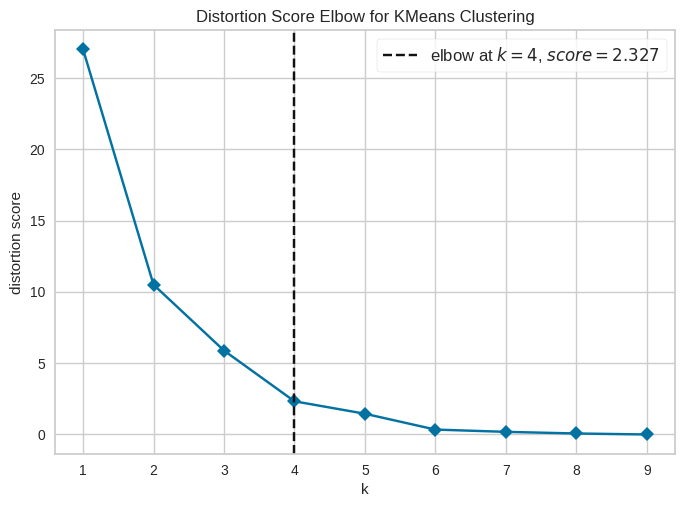

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [123]:
kmeans = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans, k=(1, 10), timings=False)

# Fit the model and visualize the Elbow Method
elbow_visualizer.fit(X_scaled)
elbow_visualizer.show()

**Apply t-SNE for Dimensionality Reduction**

We can reduce the dimensionality using t-SNE for better visualization:

In [124]:
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Adjust perplexity based on the number of samples
X_tsne = tsne.fit_transform(X_scaled)

# Print the shape of the t-SNE result
print(X_tsne.shape)

(9, 2)


**Visualization**

Now, let's visualize the clusters using a scatter plot. We'll plot Preseason Total on the x-axis and Regular Season Total on the y-axis, with colors representing the clusters.

Explanation:
The scatter plot will show us how the years are grouped into different clusters. Each point will represent a year, and the color will indicate which cluster it belongs to.

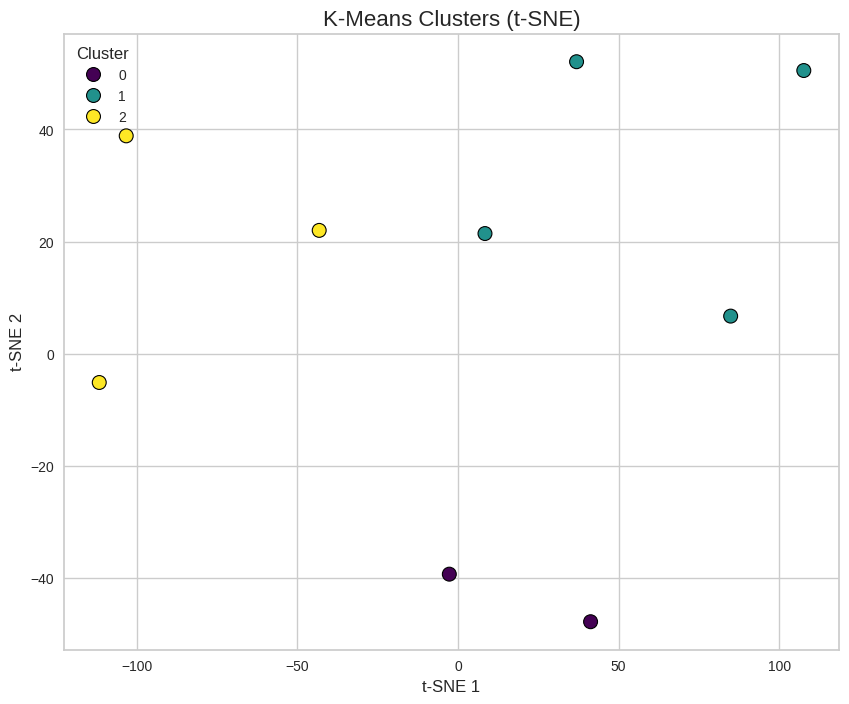

In [125]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette="viridis", s=100, edgecolor="black")

# Adding plot labels
plt.title('K-Means Clusters (t-SNE)', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.show()

In [126]:
centroids = kmeans.cluster_centers_

# Create a DataFrame to display the cluster centers
centroids_df = pd.DataFrame(centroids, columns=features)
print(centroids_df)

   Preseason Total  Regular Season Total  Regular Season + Preseason Total
0         0.702579             -0.927751                         -0.185298
1        -0.987244             -0.457172                         -0.807019
2         0.847940              1.228063                          1.199558


**Analysis**

The clustering analysis using KMeans has grouped the NFL concussion data into three distinct clusters based on concussion totals during preseason and regular season activities. These clusters represent different patterns of concussion occurrences over the years, providing insights into the relationship between preseason and regular season injuries.

**Cluster 0: Balanced Preseason and Regular Season Concussions**

The first cluster is characterized by a relatively high number of concussions during the preseason (0.702579), but a low number of concussions in the regular season (-0.927751). Despite this, the combined total of concussions (preseason + regular season) is close to average (-0.185298). This indicates that for the years in this cluster, the preseason activities had a higher concussion rate than the regular season, but the overall concussion total was relatively typical. This cluster might represent years where players experienced more injuries in the lead-up to the regular season, but the regular season didn't see as many injuries, possibly due to improved player preparation or other mitigating factors.

**Cluster 1: Below-Average Concussions Across the Board**

Cluster 2 shows below-average concussions across both the preseason (-0.987244) and regular season (-0.457172). The combined total of concussions for this cluster (-0.807019) is also below average. This cluster likely represents years when the overall concussion numbers were lower than usual. It could indicate seasons where injury prevention measures were more effective or where fewer collisions occurred during both preseason and regular season activities. The lower concussion counts in both categories suggest improved safety protocols, changes in game rules, or other factors that reduced the occurrence of concussions.

**Cluster 2: High Concussion Rates in Both Preseason and Regular Season**

Cluster 2 stands out due to its high concussion totals in both the preseason (0.847940) and regular season (1.228063). The combined total of concussions (1.199558) is also significantly higher than average. This cluster likely represents years where the concussion rates were notably higher across both preseason and regular season activities. It could indicate seasons with increased player contact, more injuries, or perhaps years with specific changes in game dynamics or rule changes that led to higher injury rates. This cluster highlights the need for further investigation into the causes of increased injuries in those years, as it suggests a potential area for improving player safety.

# **Why do our Machine Learning Models Matter?**

From our clustering using K-means, we are able to analyze patterns regarding head injuries based on the clusters that the data is assigned. For example, if there is a high number of concussions in the preseason but lower numbers in the regular season (which is represented by Cluster 0), we can detect a pattern where the lead-up to the regular season, such as training camps and practice games, may be riskier for players. From this pattern, NFL executives can implement rules and reduce the intensity of preseason activities, such as limiting contact during practice or introducing additional safety protocols.  This proactive approach could help mitigate the higher concussion risk observed in the early stages of the season and ensure better player health management overall. Additionally, Cluster 1, with below-average concussion rates across both the preseason and regular season, suggests that injury prevention measures in certain years were successful, potentially due to improved training, better equipment, or rule changes. Data analysts can use this cluster to examine what caused fewer head injuries in that specific year and create possible recommendations for replicating the success. On the other hand, when the data shows high concussion rates in both the preseason and regular season (Cluster 2), it highlights potential risk factors or changes in the game that led to an increased number of injuries. This directly correlates with the Linear Regression work we displayed, where we understand that there is a clear difference betwenen the type of player one is before and after an injury. Regarding what that player's star-status was and their preseason health alongside playing time statistics, we can understand how much time a player from various positions would have missed.This signals a need for further investigation into these years to identify the root causes and adjust policies, such as modifying training and game rules, to reduce the frequency of concussions. By analyzing these patterns, the clustering approach can help inform decisions that optimize player safety.

# **Insights**


Whether one watches the game of American Football does not really matter, as the dilemma of concussed individuals in all spheres of life worries all around them, especially in cases where the odds and known research are against them. As a whole, we as the public learn through the analysis of injury data from the NFL's archives that there are certain indicators/stress points that must be taken into account when considering the preventability status for a certain player. Whether they had an injury just recently during the preseason, or there were discrepancies and falloffs in their playtime(before and after), one can continue to utilize Machine Learning techniques when finding how to make more reliable predictions. This will surely make the NFL games we cherish every sunday substantially safer.

One of the key insights we learned from our study was the importance of nuanced data analysis in understanding the root causes of things like recurring injuries in professional sports. The various interesting relationships uncovered during our research, such as the relationship between playtime after injury and games missed, the link between preseason injuries and increased risk during the regular season, and even an increased likelihood of injury based on the team being played against, all pose new questions and open up doors for future research and interventions. By identifying factors like playtime variability and roster strength as possible factors during our research, we can better equip NFL teams, coaches, and medical staff for the task of keeping players safe on the field.

In addition, this study emphasizes the importance of predictive analytics. While we specifically set out to answer the head injuries dilemma regarding the NFL, the same methodologies and testing approaches we used can be applied to other similar domains, for example other contact sports with high risk of injury, where injury prevention is critical.

Lastly, our project sheds light on and raises questions about underrepresented areas in our data, such as the specific responsibilities of different player positions and how this may affect the risk for injury. While we touched on wide receivers, other positions might exhibit distinct patterns that we were not able to fully explore. Additionally, external variables such as differences in team training regimens, and the quality of medical intervention, could provide crucial context but were not included in our data. These gaps highlight the need for comprehensive datasets that account for qualitative and quantitative factors that may influence player injuries.

By continuing to build on our findings, leveraging larger datasets, and utilizing advanced machine learning techniques, we can contribute to a deeper understanding of head injuries in the NFL as well as sports injuries as whole, and ultimately ensure a safer environment for all players.